# <font color ="red"> Comparison of Minimum Flow Algorithms </font>


I flussi di costo minimo (o minimum cost flows in inglese) sono una classe di problemi in teoria dei grafi e ottimizzazione. Si tratta di una generalizzazione del problema di flusso di costo minimo, che è una variante del problema di flusso massimo. Nei problemi di flusso di costo minimo, oltre a massimizzare o minimizzare il flusso totale tra i nodi di un grafo, viene anche considerato il costo associato al flusso attraverso ciascun arco del grafo.

Ecco come funziona il problema dei flussi di costo minimo:

**Grafo:** Hai un grafo ordinato o non ordinato con nodi e archi. Ogni arco ha una capacità massima e un costo per l'unità di flusso attraverso di esso.


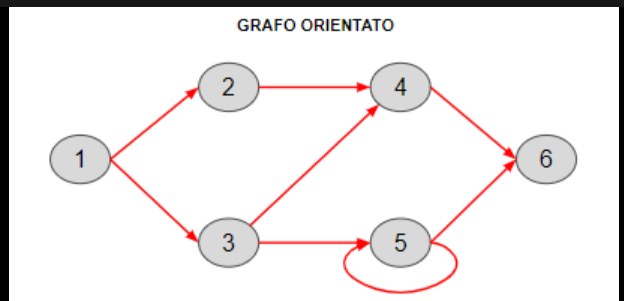


**Nodo:** Nella teoria dei grafi, i "nodi" sono gli elementi fondamentali che costituiscono un grafo. I nodi sono spesso chiamati anche "vertici" o "punti". Essi rappresentano le entità o gli oggetti del problema che stai modellando con il grafo. Ad esempio, se stai modellando una rete stradale, i nodi potrebbero rappresentare incroci o intersezioni, mentre gli archi rappresentano le strade che collegano tali incroci.

**Flusso:** Deve essere trovato un flusso da un nodo di origine a un nodo di destinazione, tenendo conto delle capacità degli archi e cercando di minimizzare il costo totale del flusso.

**Obiettivo:** L'obiettivo è minimizzare il costo totale del flusso, dove il costo totale è la somma dei costi di tutti gli archi attraverso i quali passa il flusso.

Vincoli: Il flusso totale deve rispettare i vincoli di capacità sugli archi e soddisfare le condizioni di conservazione del flusso nei nodi intermedi (la quantità di flusso che entra in un nodo è uguale alla quantità di flusso che esce dal nodo).

Il problema dei flussi di costo minimo è applicato in diverse aree, tra cui la logistica, il trasporto, le telecomunicazioni e la progettazione di reti. Un'applicazione comune è l'ottimizzazione delle reti di trasporto per determinare il flusso ottimale di beni da una fonte a una destinazione, minimizzando i costi di trasporto lungo le diverse rotte disponibili. Questo tipo di problema è spesso risolto utilizzando algoritmi di programmazione lineare, come il metodo del simplesso, o algoritmi specifici come il metodo del flusso di costo minimo.

La ricerca operativa (RO) si occupa di sviluppare e applicare metodi matematici, modelli e tecniche di ottimizzazione per risolvere problemi di pianificazione, programmazione e decisione.

## <font color = "red">Algorith for minium flow</font>


**Cycle Cancelling Algorithm:** Questo è un algoritmo per trovare il flusso di costo minimo in una rete di flusso. L'algoritmo cerca cicli negativi nella rete e cerca di eliminare tali cicli per ridurre il costo totale del flusso. È un algoritmo polinomiale.

**Successive Shortest Path Algorithm:** Questo è un algoritmo utilizzato per risolvere il problema di flusso di costo minimo. Si basa sulla ricerca di percorsi di costo minimo successivi dalla sorgente alla destinazione nella rete di flusso. Può essere utilizzato per problemi di flusso a costo minimo e flusso di costo minimo massimo.

**Primal-Dual Algorithm:** Gli algoritmi primal-dual sono utilizzati per risolvere una varietà di problemi di programmazione lineare. Questi algoritmi lavorano sia sulle variabili primali che su quelle duali contemporaneamente. L'algoritmo primal-dual può essere adattato per risolvere problemi di flusso di costo minimo.

**Out-of-Kilter Algorithm:** L'algoritmo "Out-of-Kilter" È utilizzato per risolvere il problema di flusso di costo minimo con algoritmi basati su ciclo. L'obiettivo è bilanciare il flusso attraverso gli archi per minimizzare il costo totale del flusso.

**Algoritmi Polinomiali:** Gli algoritmi polinomiali sono quelli il cui tempo di esecuzione cresce in modo polinomiale rispetto alle dimensioni del problema. Ad esempio, l'algoritmo di Ford-Fulkerson è un algoritmo polinomiale per il problema di flusso massimo.

**Algoritmi Fortemente Polinomiali:** Gli algoritmi fortemente polinomiali sono una classe speciale di algoritmi polinomiali il cui tempo di esecuzione cresce in modo polinomiale non solo rispetto alle dimensioni del problema, ma anche rispetto ai valori numerici coinvolti. Gli algoritmi fortemente polinomiali sono molto efficienti e possono essere risolti in tempo ragionevole. Un esempio è l'algoritmo di Edmonds-Karp per il flusso di costo minimo.

Questi algoritmi sono utilizzati in diversi contesti, tra cui il trasporto, le telecomunicazioni, la progettazione di reti e altre applicazioni che coinvolgono l'ottimizzazione dei flussi e dei costi in una rete o un grafo. La scelta dell'algoritmo dipende spesso dalle caratteristiche specifiche del problema e dalle prestazioni desiderate.



Prima di implementare per confrontare le performance gli algoritmi abbiam bisogno di un modo per generare dei grafi di X nodi in modo casuale

Iniziamo andando a importare le librerie che ci serviranno (usiamo python)

In [10]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt


useremo un "n" scelto in modo arbitrario per indicare il numero dei nodi


In [2]:
n = 5  # Numero di nodi nel grafo
#Se si vuole scegliere un numero casuale basta usare la funzione rand presente in libreria

Generiamo una matrice di adiacenza casuale (0 o 1) per rappresentare la struttura del grafo


In [3]:
adjacency_matrix = np.random.randint(0, 2, (n, n))


Creiamo un grafo diretto utilizzando NetworkX


In [4]:
G = nx.DiGraph()


Aggiungo nodi al grafo

In [5]:
# Aggiungo nodi al grafo
G.add_nodes_from(range(n))

# Aggiungo archi con capacità e costi casuali in base alla matrice di adiacenza
for i in range(n):
    for j in range(n):
        if i != j and adjacency_matrix[i, j] == 1:
            capacity = random.randint(1, 10)  # Capacità casuale
            cost = random.randint(1, 5)      # Costo casuale
            G.add_edge(i, j, capacity=capacity, cost=cost)

# Ora ho un grafo diretto con capacità e costi casuali

Visualizzo il grafo

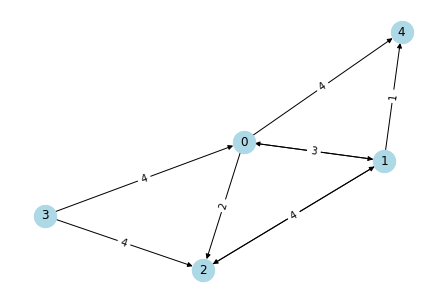

In [7]:
# Visualizza il grafo
pos = nx.spring_layout(G)  # Posiziona i nodi in modo da renderli più leggibili
labels = {edge: G.edges[edge]['cost'] for edge in G.edges}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

Ora che abbiamo un modo per creare un grafo (in questo caso orientato ma l'implementazione per farlo non orientato è analoga) casuale, adesso andremo a implementare due algortimti per il flusso minimo e infine a confrontarli

# <font color = "red">Cycle Cancelling Algorithm</font>

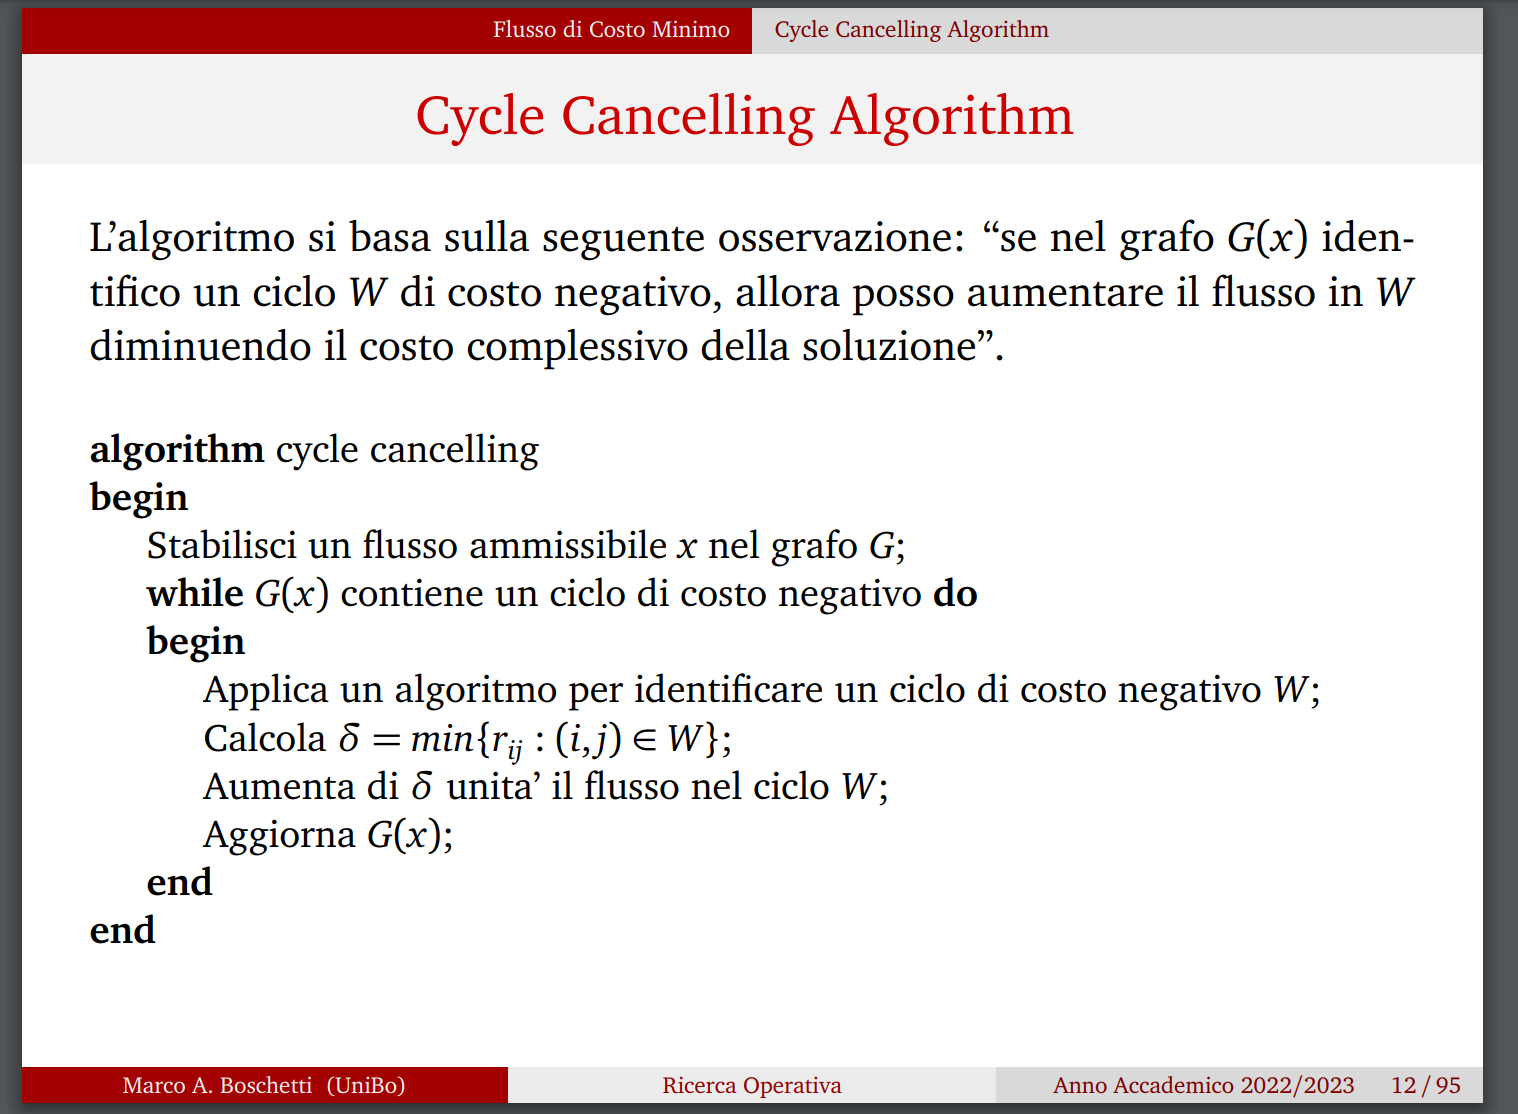

L'algortimo **cycle cancelling** viene utilizzato per calcolare il flusso minimo in un grafo. 

Il suo obbiettivo è determinare la quantità minima di flusso che può essere inviata da una sorgente ad una destinazione attraverso un grafo ponderato, rispettando le capacità degli archi e soddisfacendo i vincoli di conservazione del flusso nei nodi intermedi.

Il processo dell'algoritmo coinvolge la ricerca di cicli negativi nel grafo residuo, dove il grafo residuo rappresenta le capacità residue degli archi dopo l'invio del flusso corrente. 
Una volta individuato un ciclo di negativo, il flusso viene aumentato lungo gli archi all'interno del ciclo in modo da ridurre la negatività. 

Questo processo continua fino a quando non è più possibile trovare cicli negativi nel grafo residuo.
L'algoritmo di "cycle cancelling" è una delle tecniche classiche per risolvere il problema del flusso minimo e garantisce la convergenza a una soluzione ottimale. È particolarmente utile quando le capacità degli archi sono variabili o quando si desidera trovare il flusso minimo in un grafo di grandi dimensioni.


Una possibile implementazione è la seguente:

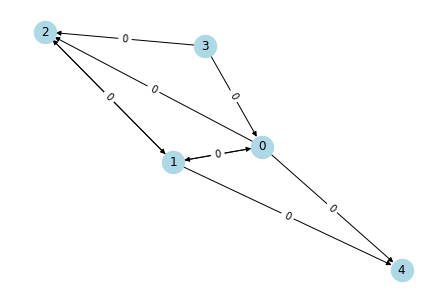

In [9]:
def cycle_cancelling_algorithm(G):
    # Inizializzo il flusso nullo
    for edge in G.edges(data=True):
        edge[2]['flow'] = 0

    while True:
        # Calcolo il costo ridotto degli archi
        for edge in G.edges(data=True):
            edge[2]['reduced_cost'] = edge[2]['cost'] - edge[2]['flow']

        # Trovo un ciclo negativo
        cycle = find_negative_cycle(G)
        
        if not cycle:
            # Se non ci sono cicli negativi, il flusso è ottimo
            break
        
        # Calcolo la capacità residua del ciclo
        capacity = min(edge[2]['capacity'] for edge in cycle)
        
        # Aggiorno il flusso sul ciclo
        for edge in cycle:
            edge[2]['flow'] += capacity

    return G

def find_negative_cycle(G):
    visited = set()
    stack = []
    
    for node in G.nodes():
        if node not in visited:
            visited.add(node)
            stack.append((node, []))
            
            while stack:
                current, path = stack[-1]
                del stack[-1]
                
                for neighbor in G.neighbors(current):
                    if neighbor not in visited:
                        visited.add(neighbor)
                        stack.append((neighbor, path + [current]))
                    elif neighbor in path:
                        # Ciclo trovato, verifichiamo se è negativo
                        cycle = path[path.index(neighbor):] + [neighbor]
                        if is_negative_cycle(G, cycle):
                            return cycle
    return []

def is_negative_cycle(G, cycle):
    cycle_cost = sum(G.edges[edge]['reduced_cost'] for edge in G.edges(data=True) if edge in cycle)
    return cycle_cost < 0

# Eseguo l'algoritmo di Cycle Cancelling sul grafo G generato in precedenza
resulting_graph = cycle_cancelling_algorithm(G)

# Visualizzo il risultato
pos = nx.spring_layout(resulting_graph)
labels = {edge: resulting_graph.edges[edge]['flow'] for edge in resulting_graph.edges}
nx.draw(resulting_graph, pos, with_labels=True, node_size=500, node_color='lightblue')
nx.draw_networkx_edge_labels(resulting_graph, pos, edge_labels=labels)
plt.show()

Questo codice esegue l'algoritmo di **Cycle Cancelling** sul grafo diretto con capacità e costi casuali che hai generato in precedenza. Una volta terminata l'ottimizzazione, visualizza il risultato graficamente, mostrando il flusso su ciascun arco del grafo.

Si noti che questa è un'implementazione semplificata a scopo illustrativo. In una situazione reale, potresti dover gestire situazioni più complesse e condizioni di uscita specifiche per il tuo problema.

## <font color = "red">Performance</font>

Le performance dell'algoritmo di **Cycle Cancelling** possono variare in base alla complessità della rete e alla dimensione del problema. Questo algoritmo è un algoritmo di tipo polinomiale e garantisce di convergere a una soluzione ottima in un numero finito di iterazioni. Tuttavia, il numero di iterazioni richieste può essere significativo in alcune situazioni, soprattutto se la rete è complessa o contiene cicli negativi numerosi.

Le performance dell'algoritmo dipenderanno anche da fattori come la struttura della rete, le capacità degli archi e i costi associati.

Per reti di grandi dimensioni o problemi di flusso di costo minimo molto complessi, potrebbero essere preferibili altri algoritmi più efficienti, come l'Algoritmo di Ford-Fulkerson o l'Algoritmo di Edmonds-Karp, che sono noti per le loro ottime performance nella risoluzione dei problemi di flusso di costo minimo.

L'algoritmo di Cycle Cancelling è solitamente analizzato come avere una complessità asintotica di O(E^2 * V), dove:

E è il numero di archi nella rete.
V è il numero di nodi nella rete.
Questo significa che, in una situazione peggiore, il numero di operazioni richieste cresce quadraticamente rispetto al numero di archi e in modo lineare rispetto al numero di nodi nella rete.

Con 5 nodi e 7 archi nella rete, la complessità asintotica dell'algoritmo di Cycle Cancelling è stimata come O(7^2 * 5), il che si semplifica a O(49 * 5). Quindi, la complessità asintotica in questo caso specifico è **O(245)**.

Nel caso peggiore il Cycle Cancelling Algorithm esegue **O(mCU)** iterazioni.



# <font color = "red">Successive Shortest Path Algorithm (SSPA)</font>

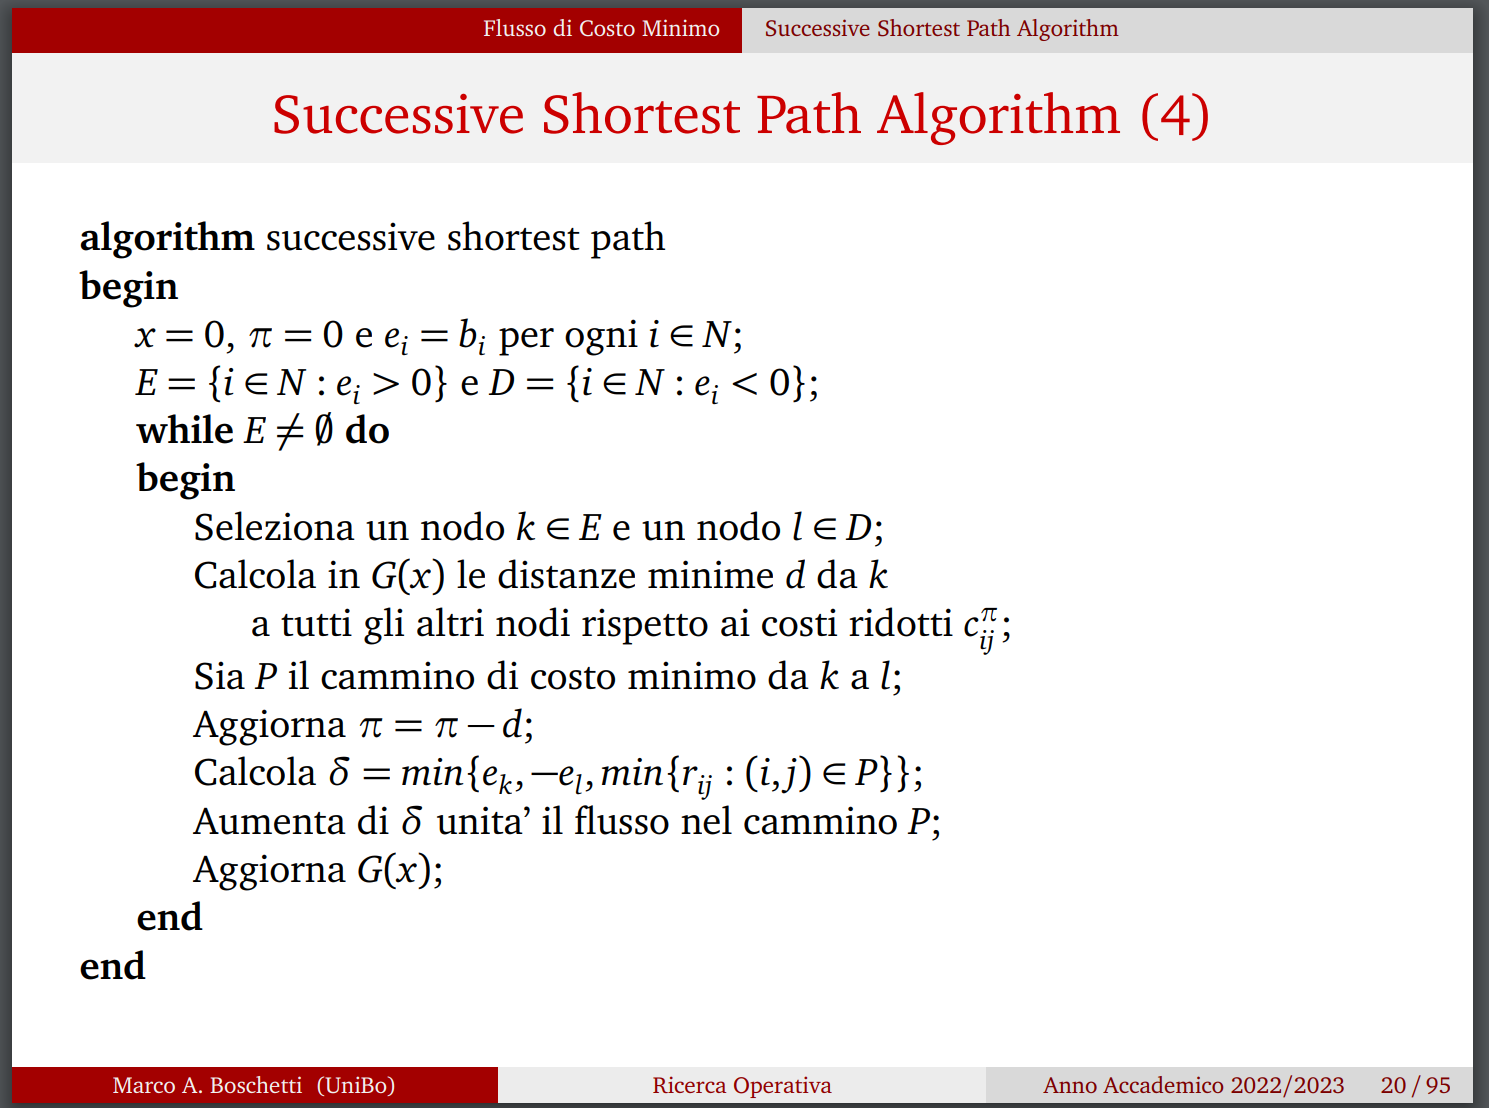

Il **Successive Shortest Path Algorithm (SSPA)** è un algoritmo utilizzato per risolvere il problema del flusso di costo minimo in una rete di flusso. Questo algoritmo è una variante dell'Algoritmo di Ford-Fulkerson, che è stato sviluppato da Edward F. Moore nel 1956. 

Ecco come funziona il Successive Shortest Path Algorithm:

1. Inizia con un flusso nullo o con un flusso ammissibile (rispettando le capacità degli archi).

2. Calcola il costo ridotto di ogni arco nella rete. Il costo ridotto è il costo associato a un'unità di flusso aggiuntivo su quell'arco.

3. Utilizza l'algoritmo del cammino più breve (come l'algoritmo di Bellman-Ford o Dijkstra) per trovare un cammino minimo da una sorgente a una destinazione basato sui costi ridotti. Questo cammino rappresenta il "cammino più breve del flusso" in termini di costo ridotto.

4. Se un cammino minimo non è stato trovato, il flusso è ottimo e l'algoritmo si ferma.

5. Altrimenti, aumenta il flusso sul cammino minimo tanto quanto possibile, tenendo conto delle capacità rimanenti sugli archi nel cammino.

6. Ripeti i passi 2-5 fino a quando non ci sono più cammini minimi da trovare.

7. Alla fine del processo, avrai trovato il flusso di costo minimo in base ai costi ridotti.

Il Successive Shortest Path Algorithm è efficiente e garantisce la convergenza a una soluzione ottima. È particolarmente utile quando hai bisogno di calcolare il flusso di costo minimo in una rete, ad esempio nell'ottimizzazione dei flussi di trasporto o di comunicazione.

Va notato che l'algoritmo può essere adattato per gestire reti con archi a capacità continue o intere. Inoltre, le implementazioni efficienti dell'algoritmo utilizzano spesso strutture dati avanzate, come le code a priorità, per trovare rapidamente i cammini minimi nella rete.

Andò a fare un implementazione di esso basandomi sempre sul grafo generato casualmente al inizio

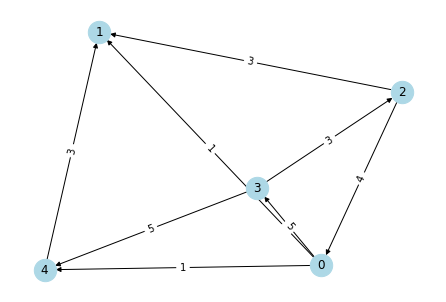

In [3]:
n = 5  # Numero di nodi nel grafo

# Genera una matrice di adiacenza casuale (0 o 1) per rappresentare la struttura del grafo
adjacency_matrix = np.random.randint(0, 2, (n, n))

# Crea un grafo diretto utilizzando NetworkX
G = nx.DiGraph()

# Aggiungi nodi al grafo
G.add_nodes_from(range(n))

# Aggiungi archi con capacità e costi casuali in base alla matrice di adiacenza
for i in range(n):
    for j in range(n):
        if i != j and adjacency_matrix[i, j] == 1:
            capacity = random.randint(1, 10)  # Capacità casuale
            cost = random.randint(1, 5)      # Costo casuale
            G.add_edge(i, j, capacity=capacity, cost=cost)

# Visualizza il grafo
pos = nx.spring_layout(G)  # Posiziona i nodi in modo da renderli più leggibili
labels = {edge: G.edges[edge]['cost'] for edge in G.edges}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [ ]:
def successive_shortest_path_algorithm(G, source_node, sink_node):
    # Inizializza il flusso nullo su tutti gli archi
    for u, v in G.edges():
        G[u][v]['flow'] = 0

    while True:
        # Calcola i costi ridotti sugli archi
        for u, v in G.edges():
            G[u][v]['reduced_cost'] = G[u][v]['cost'] - G[u][v]['flow']

        # Cerca un cammino minimo di costo ridotto dalla sorgente al pozzo
        try:
            path = nx.shortest_path(G, source=source_node, target=sink_node, weight='reduced_cost', method='bellman-ford')
        except nx.NetworkXNoPath:
            # Nessun cammino minimo trovato, il flusso è ottimo
            break

        # Calcola la capacità residua del cammino minimo
        residual_capacity = min(G[u][v]['capacity'] - G[u][v]['flow'] for u, v in zip(path, path[1:]))

        # Aggiorna il flusso sul cammino minimo
        for u, v in zip(path, path[1:]):
            G[u][v]['flow'] += residual_capacity
            G[v][u]['flow'] -= residual_capacity  # Flusso opposto

    return G

# Eseguo l'algoritmo SSPA sul grafo G con le etichette specifiche dei nodi sorgente e pozzo
resulting_graph = successive_shortest_path_algorithm(G, source_node, sink_node)



## <font color = "red">Performance</font>

La complessità dell'algoritmo **Successive Shortest Path Algorithm (SSPA)** per il calcolo del flusso di costo minimo in una rete di flusso è generalmente descritta come segue:

1. Inizializzazione del flusso nullo su tutti gli archi: Questa fase richiede un tempo lineare rispetto al numero di archi nella rete, cioè O(E), dove E è il numero di archi.

2. Calcolo dei costi ridotti sugli archi: Calcolare i costi ridotti per ogni arco richiede un tempo lineare rispetto al numero di archi, quindi anche O(E).

3. Cerca un cammino minimo di costo ridotto: Trovare un cammino minimo di costo ridotto dalla sorgente al pozzo può essere eseguito utilizzando un algoritmo come il Bellman-Ford. La complessità temporale dell'algoritmo Bellman-Ford è O(V*E), dove V è il numero di nodi e E è il numero di archi. Poiché la rete di flusso è solitamente densa (E è proporzionale a V^2), la complessità è spesso approssimata come O(V^3).

4. Calcolo della capacità residua e aggiornamento del flusso: Calcolare la capacità residua del cammino minimo richiede un tempo lineare rispetto alla lunghezza del cammino (numero di archi nel cammino), quindi in genere O(V). L'aggiornamento del flusso richiede un tempo lineare rispetto alla lunghezza del cammino, quindi O(V).

5. Ripeti il ciclo finché il flusso non è ottimo: In ogni iterazione, si cerca un cammino minimo di costo ridotto e si aggiorna il flusso. Il numero di iterazioni dipende dalla complessità del problema e dalla densità della rete, ma il numero di iterazioni è spesso limitato e non cresce con V o E. Quindi, il numero di iterazioni viene spesso considerato come O(1) in un contesto di complessità.

In sintesi, la complessità totale dell'algoritmo SSPA è dominata dal passo 3, che è la ricerca del cammino minimo di costo ridotto, con una complessità approssimativa di O(V^3) in una rete densa. Le altre fasi dell'algoritmo hanno complessità lineari rispetto al numero di archi o alla dimensione del cammino minimo.

Poiché il numero di nodi (V) è 5 e il numero di archi (E) è 7, la complessità sarà approssimativamente O(V^3) per il passo 3.
Che è minore di quella del CCA ma di poco


# <font color = "red">Conclusion</font>

In generale, l'algoritmo Successive Shortest Path Algorithm (SSPA) tende ad avere una complessità computazionale inferiore rispetto all'algoritmo Cycle Cancelling per grafi di piccole dimensioni o per grafi con una densità moderata di archi. La complessità dell'algoritmo SSPA è principalmente influenzata dalla ricerca dei cammini minimi di costo ridotto, che può essere più efficiente rispetto all'approccio basato su cicli dell'algoritmo Cycle Cancelling, specialmente per grafi più piccoli.

Tuttavia, la scelta tra i due algoritmi dipende anche dalla struttura specifica del grafo, dalla distribuzione dei costi sugli archi e dagli obiettivi di ottimizzazione. Alcuni grafi potrebbero beneficiare maggiormente dell'algoritmo Cycle Cancelling, mentre altri potrebbero essere più adatti per l'algoritmo SSPA.

Si noti che l'algoritmo del cycle cancelling è specificamente progettato per risolvere il problema del flusso minimo in grafi a costo minimo, mentre SSP può essere utilizzato su una gamma più ampia di problemi di flusso. La differenza nei risultati potrebbe essere dovuta a come ciascun algoritmo gestisce determinate configurazioni di grafo o costi negativi.

# <font color ="green">Test con Grafo Complesso</font>

genero un grafo da 50 nodi e verifico l'efficienza dei due algoritmi analizzati

In [18]:
n = 50  # Numero di nodi nel grafo

# Crea un grafo diretto utilizzando NetworkX
G = nx.DiGraph()

# Aggiungi nodi al grafo con nomi casuali
node_names = [f'Node_{i}' for i in range(n)]  # Nomi dei nodi
G.add_nodes_from(node_names)

# Aggiungi archi con capacità e costi casuali
for i in range(n):
    for j in range(n):
        if i != j:
            capacity = random.randint(1, 10)  # Capacità casuale
            cost = random.randint(1, 5)      # Costo casuale
            G.add_edge(node_names[i], node_names[j], capacity=capacity, cost=cost)

# Ora hai un grafo diretto con 50 nodi e archi casuali




utilizzo per primo il Cycle Cancelling

In [ ]:
def cycle_canceling_algorithm(G):
    # Inizializza il flusso nullo
    for u, v in G.edges():
        G[u][v]['flow'] = 0

    while True:
        # Calcola il costo ridotto degli archi
        for u, v in G.edges():
            G[u][v]['reduced_cost'] = G[u][v]['cost'] - G[u][v]['flow']

        # Trova un ciclo negativo
        cycle = find_negative_cycle(G)

        if not cycle:
            # Se non ci sono cicli negativi, il flusso è ottimo
            break

        # Calcola la capacità residua del ciclo
        capacity = min(G[u][v]['capacity'] - G[u][v]['flow'] for u, v in cycle)

        # Aggiorna il flusso sul ciclo
        for u, v in cycle:
            G[u][v]['flow'] += capacity

    return G

def find_negative_cycle(G):
    # Utilizza l'algoritmo Bellman-Ford per trovare un ciclo negativo
    try:
        path = nx.bellman_ford_path(G, source=0, target=0, weight='reduced_cost')
        return path
    except nx.NetworkXNoPath:
        return None

# Esegui l'algoritmo di Cycle Cancelling sul grafo G
resulting_graph = cycle_canceling_algorithm(G)



creo un grafo analogo da 50 nodi su cui usare SSPA

In [ ]:
n = 50  # Numero di nodi nel grafo

# Crea un grafo diretto utilizzando NetworkX
G = nx.DiGraph()

# Aggiungi nodi al grafo con nomi casuali
node_names = [f'Node_{i}' for i in range(n)]  # Nomi dei nodi
G.add_nodes_from(node_names)

# Aggiungi archi con capacità e costi casuali
for i in range(n):
    for j in range(n):
        if i != j:
            capacity = random.randint(1, 10)  # Capacità casuale
            cost = random.randint(1, 5)      # Costo casuale
            G.add_edge(node_names[i], node_names[j], capacity=capacity, cost=cost)

# Ora hai un grafo diretto con 50 nodi e archi casuali

In [ ]:
def successive_shortest_path_algorithm(G, source_node, sink_node):
    # Inizializza il flusso nullo su tutti gli archi
    for u, v in G.edges():
        G[u][v]['flow'] = 0

    while True:
        # Calcola i costi ridotti sugli archi
        for u, v in G.edges():
            G[u][v]['reduced_cost'] = G[u][v]['cost'] - G[u][v]['flow']

        # Cerca un cammino minimo di costo ridotto dalla sorgente al pozzo
        try:
            path = nx.shortest_path(G, source=source_node, target=sink_node, weight='reduced_cost', method='bellman-ford')
        except nx.NetworkXNoPath:
            # Nessun cammino minimo trovato, il flusso è ottimo
            break

        # Calcola la capacità residua del cammino minimo
        residual_capacity = min(G[u][v]['capacity'] - G[u][v]['flow'] for u, v in zip(path, path[1:]))

        # Aggiorna il flusso sul cammino minimo
        for u, v in zip(path, path[1:]):
            G[u][v]['flow'] += residual_capacity
            G[v][u]['flow'] -= residual_capacity  # Flusso opposto

    return G

# Esegui l'algoritmo SSPA sul grafo
source_node = 0  # Nodo sorgente
sink_node = 49   # Nodo pozzo
resulting_graph = successive_shortest_path_algorithm(G, source_node, sink_node)


## <font color ="red"> Conclusion </font>

Con un grafo di 50 nodi, la complessità dell'algoritmo di "Cycle Canceling" potrebbe diventare significativa, specialmente se il grafo ha molte iterazioni o richiede un numero elevato di passaggi per raggiungere il flusso ottimo. La complessità esatta dipenderà dalla struttura del grafo, dalla densità degli archi e dalla distribuzione dei costi.

L'algoritmo di "Cycle Canceling" è noto per avere una complessità teorica più elevata rispetto a metodi più efficienti come il "Successive Shortest Path Algorithm" (SSPA) o il "Minimum Cost Flow". In molti casi, soprattutto con grafi di grandi dimensioni, potrebbe essere preferibile utilizzare un algoritmo diverso per risolvere il problema di flusso di costo minimo.
la complessità dell'algoritmo SSPA sia nell'ordine di O(50^3 * E).

La densità del grafo (rapporto tra il numero di archi e il numero possibile di archi) può influenzare significativamente la complessità. Se il grafo ha una densità bassa (cioè pochi archi), l'algoritmo potrebbe essere più efficiente. D'altra parte, un grafo più denso con molteplici archi potrebbe richiedere più tempo.

**Quindi**, per un grafo di dimensioni ridotte conviene usare **SSPA**, se le dimensioni aumentano in modo significato ma la densità resta bassa conviene invece il **Cycle Cancelling**, se la struttura del grafo è particolarmente complessa converrà, invece, **SSPA**. 
Possiamo capire che l'efficienza dipenda dalla tipolgia di grafo, dalle iterazioni, dal tempo di quest'ultime, dalla dimensione e dalla densità del grafo.

https://thescipub.com/pdf/jcssp.2023.75.86.pdf